In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
SSE_y,SSE_x=[],[] #set SSE as the global variable to add items and read it finally 
#compute the SSE values 
def SSE_count(k,number):
    SSE_y.append(number)

def find_points(k,data):
    points,index,distance=[],[],[]
    rand=np.random.randint(0,len(data))  #select the first point
    points.append([data.iloc[rand][0],data.iloc[rand][1]]) 
    
    #create the diastance(Series) to store the data of distance
    for i in range(len(data)):
        distance.append(0)
    distance=pd.Series(distance)
    
    #to find out the next points whose distance value is the highest 
    for num in range(k-1):
        for point in range(len(points)):
            temp=pow(pow(data.x-points[point][0],2)+pow(data.y-points[point][1],2),0.5)
            distance+=temp
        if distance.argmax() not in index:
            index.append(distance.argmax())
            
        #avoiding the same point being selected thus set the data 0
        else:
            distance[distance.argmax()]=0
        points.append([data.iloc[distance.argmax()][0],data.iloc[distance.argmax()][1]])
        distance[:]=0  #clear the all values to prepare the next compute
        
    return points  #the final selected points
    
def k_means(data,k,points,problem):
    count=1
    #xpoints is the object storing the current point to know whether the points being stable
    xpoints=[] 
    for a in range(k):
        xpoints.append([0,0])
    while True:
        diction={}
        total=0
        #compute the distance from each point to the centroids 
        for j in range(k):
            diction[j]=pow(data.x-points[j][0],2)+pow(data.y-points[j][1],2)
        df=pd.DataFrame(diction)
        group={}
        for i in range(k):
            group[i]=[]
        for num in range(len(data)):  #find the closest point and group it 
                group[df.iloc[num].argmin()].append(num)
                total+=pow(df.iloc[num].min(),0.5)

        for a in range(k):
            if len(group[a])==0: #avoiding dividing error
                continue
            #re-find the centriods
            xpoints[a][0]=sum(data.x[group[a]])/len(group[a])
            xpoints[a][1]=sum(data.y[group[a]])/len(group[a])
        
        if xpoints==points:  #points being stable
            SSE_count(k,total)
            return count
        
        for a in range(k): #avoiding points and xpoints are the same object and renew it
            points[a]=list(xpoints[a])
        count+=1
        #graphing
        if problem==1:       
            color_var=["purple","green","blue","yellow"]
            for num in range(k):
                plt.scatter(data.x[group[num]],data.y[group[num]],color=color_var[num])
            x,y=[],[]
            for b in range(k):
                x.append(points[b][0])
                y.append(points[b][1])
            plt.scatter(x,y,color="black")
            plt.show()
        elif problem==2 or problem==3:
            continue
                 
original=pd.read_csv("cdata.csv")
data=original[original.columns[:2]]

C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavi

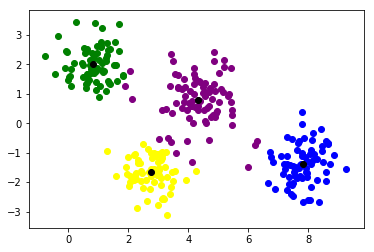

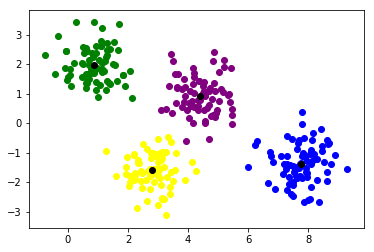

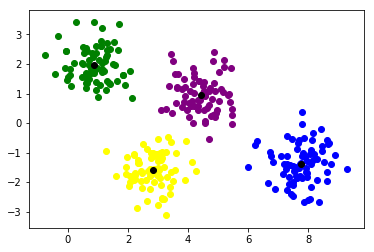

In [4]:
#implement steps of clustering
points,diction=[],{}
points=find_points(4,data)
k_means(data,4,points,1)
SSE_x.clear()
SSE_y.clear()

C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
C:\Users\1234\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavi

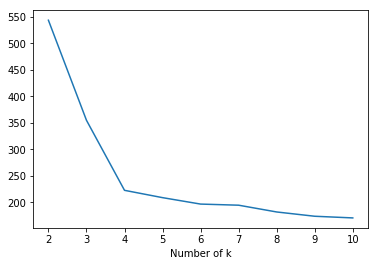

In [5]:
#show the error of different assigned points from 2 to 11
for command in range(2,11):
    points,diction=[],{}
    points=find_points(command,data)
    k_means(data,command,points,2)
    points.clear()
plt.plot(list(range(2,11)),SSE_y)
plt.xlabel('Number of k')
plt.show()
SSE_x.clear()
SSE_y.clear()